In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

1.Import the dataset

In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9346 entries, 0 to 9345
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  9346 non-null   int64  
 1   age                     9346 non-null   float64
 2   hypertension            9346 non-null   int64  
 3   heart_disease           9346 non-null   int64  
 4   ever_married            9346 non-null   object 
 5   work_type               9346 non-null   object 
 6   Residence_type          9346 non-null   object 
 7   avg_glucose_level       9346 non-null   float64
 8   smoking_status          9346 non-null   object 
 9   stroke                  9346 non-null   int64  
 10  bmi                     9346 non-null   float64
 11  ever_married_encoded    9346 non-null   int64  
 12  work_type_encoded       9346 non-null   int64  
 13  smoking_status_encoded  9346 non-null   int64  
 14  Residence_type_encoded  9346 non-null   

In [101]:
df.isnull().sum()

gender                    0
age                       0
hypertension              0
heart_disease             0
ever_married              0
work_type                 0
Residence_type            0
avg_glucose_level         0
smoking_status            0
stroke                    0
bmi                       0
ever_married_encoded      0
work_type_encoded         0
smoking_status_encoded    0
Residence_type_encoded    0
dtype: int64

2.Data Preprocessing

Handling Missing Data

In [3]:
df['bmi_imputed'] = df['bmi']

In [4]:
df['bmi_imputed'][df['bmi_imputed'].isnull()]

1      NaN
8      NaN
13     NaN
19     NaN
27     NaN
        ..
5039   NaN
5048   NaN
5093   NaN
5099   NaN
5105   NaN
Name: bmi_imputed, Length: 201, dtype: float64

In [5]:
df['bmi_imputed'][df['bmi_imputed'].isnull()] = df['bmi'].dropna().sample(df['bmi'].isnull().sum()).values

C:\Users\vansh\AppData\Local\Temp\ipykernel_17276\2963583099.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bmi_imputed'][df['bmi_imputed'].isnull()] = df['bmi'].dropna().sample(df['bmi'].isnull().sum()).values


In [6]:
df['bmi'].dropna().sample(df['bmi'].isnull().sum()).values

array([26.6, 27.1, 20.4, 16. , 30.3, 27.8, 28.1, 25.4, 18.2, 26.7, 44.2,
       26.1, 34. , 25.3, 29. , 21.1, 34.4, 42.5, 23. , 20.2, 27.6, 28. ,
       25. , 28.1, 28.6, 23.8, 33.1, 45.2, 18.7, 27.8, 26.9, 22.5, 31.6,
       16.9, 35.4, 21.1, 26.7, 26.7, 26.3, 33.3, 24.2, 33.5, 18.8, 25.6,
       36.7, 27.2, 30. , 35.9, 24.3, 27.6, 20.1, 16.1, 36.1, 28.8, 23.4,
       20.3, 37.2, 25.8, 35.1, 30.7, 24.3, 22.1, 31.8, 35.8, 40.1, 36.9,
       22.7, 34.3, 20.9, 23.8, 43.9, 19.5, 33. , 21.3, 32.6, 26.8, 34.5,
       35.8, 28.1, 16.9, 31.2, 21.5, 22.8, 35.7, 28.3, 35.2, 17.1, 26.4,
       23.6, 31.4, 25. , 27. , 30.7, 29.2, 31.9, 14.6, 43.9, 26.6, 22.3,
       19.5, 42.4, 16.9, 27.9, 36.7, 34.7, 19.5, 28.2, 35.2, 39. , 37.4,
       29.5, 30.3, 35.3, 18.5, 27.5, 39.9, 26.5, 29.1, 29.1, 36.2, 23.1,
       25.1, 18.7, 29.9, 30.6, 25.9, 22.3, 35.9, 60.2, 18.9, 21.5, 31.1,
       21.3, 30.5, 31. , 29.4, 29.8, 34.9, 23.9, 29.5, 27.6, 24.3, 29. ,
       33.2, 36.7, 36.3, 32.4, 32.3, 40. , 23.5, 15

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


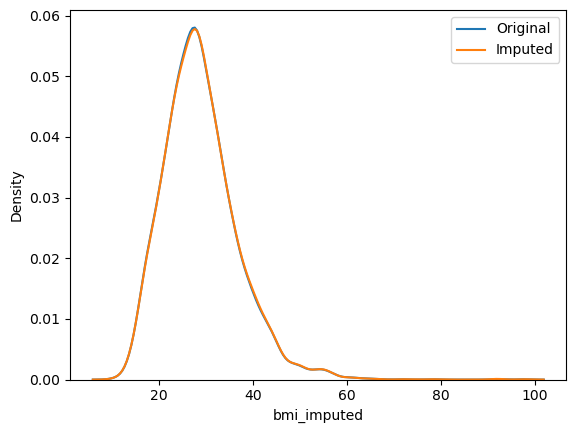

In [7]:
sns.distplot(df['bmi'],label='Original',hist=False)
sns.distplot(df['bmi_imputed'],label='Imputed',hist=False)

plt.legend()

In [8]:
df.drop(columns ='bmi',axis=1,inplace = True)

In [9]:
df.rename(columns={'bmi_imputed':'bmi'},inplace = True)

In [10]:
df.drop(columns ='id',axis=1,inplace = True)

In [11]:
df.drop(3116,axis=0,inplace=True)

In [12]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke,bmi
0,Male,67.0,0,1,Yes,Private,Urban,228.69,formerly smoked,1,36.6
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,never smoked,1,33.2
2,Male,80.0,0,1,Yes,Private,Rural,105.92,never smoked,1,32.5
3,Female,49.0,0,0,Yes,Private,Urban,171.23,smokes,1,34.4
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,never smoked,1,24.0
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,never smoked,0,29.6
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,never smoked,0,40.0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,never smoked,0,30.6
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,formerly smoked,0,25.6


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

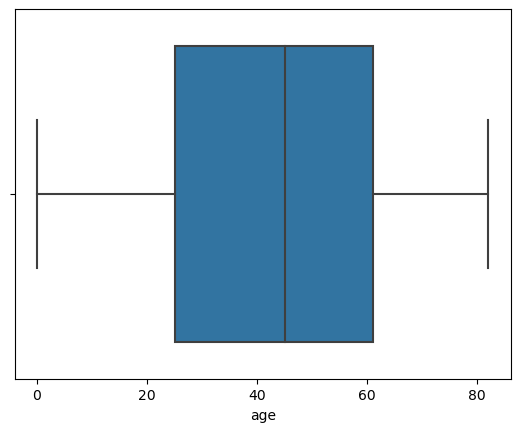

In [13]:
sns.boxplot(df['age'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

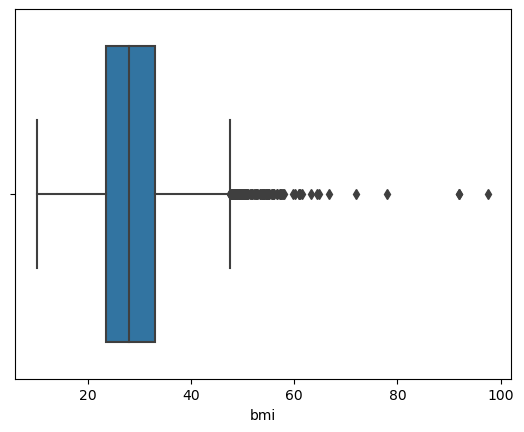

In [14]:
sns.boxplot(df['bmi'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='avg_glucose_level'>

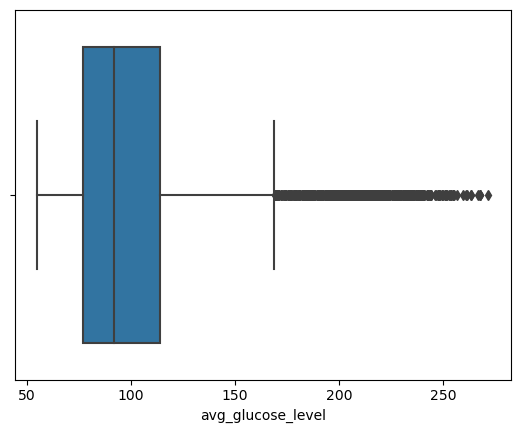

In [15]:
sns.boxplot(df['avg_glucose_level'])

In [16]:
df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
smoking_status        object
stroke                 int64
bmi                  float64
dtype: object

In [17]:
label_encoder = LabelEncoder()

In [18]:
df['gender'] = label_encoder.fit_transform(df['gender'])

In [19]:
print("Mapping:", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

Mapping: {'Female': 0, 'Male': 1}


In [20]:
df['ever_married_encoded'] = label_encoder.fit_transform(df['ever_married'])

In [21]:
print("Mapping:", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

Mapping: {'No': 0, 'Yes': 1}


In [22]:
print("Mapping:", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

Mapping: {'No': 0, 'Yes': 1}


In [23]:
df['work_type_encoded'] = label_encoder.fit_transform(df['work_type'])

In [24]:
print("Mapping:", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

Mapping: {'Govt_job': 0, 'Never_worked': 1, 'Private': 2, 'Self-employed': 3, 'children': 4}


In [25]:
df['smoking_status_encoded'] = label_encoder.fit_transform(df['smoking_status'])

In [26]:
print("Mapping:", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

Mapping: {'Unknown': 0, 'formerly smoked': 1, 'never smoked': 2, 'smokes': 3}


In [27]:
df['Residence_type_encoded'] = label_encoder.fit_transform(df['Residence_type'])

In [28]:
print("Mapping:", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

Mapping: {'Rural': 0, 'Urban': 1}


In [29]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke,bmi,ever_married_encoded,work_type_encoded,smoking_status_encoded,Residence_type_encoded
0,1,67.0,0,1,Yes,Private,Urban,228.69,formerly smoked,1,36.6,1,2,1,1
1,0,61.0,0,0,Yes,Self-employed,Rural,202.21,never smoked,1,33.2,1,3,2,0
2,1,80.0,0,1,Yes,Private,Rural,105.92,never smoked,1,32.5,1,2,2,0
3,0,49.0,0,0,Yes,Private,Urban,171.23,smokes,1,34.4,1,2,3,1
4,0,79.0,1,0,Yes,Self-employed,Rural,174.12,never smoked,1,24.0,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,Yes,Private,Urban,83.75,never smoked,0,29.6,1,2,2,1
5106,0,81.0,0,0,Yes,Self-employed,Urban,125.20,never smoked,0,40.0,1,3,2,1
5107,0,35.0,0,0,Yes,Self-employed,Rural,82.99,never smoked,0,30.6,1,3,2,0
5108,1,51.0,0,0,Yes,Private,Rural,166.29,formerly smoked,0,25.6,1,2,1,0


In [30]:
df['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64

3.Removing outliers

<AxesSubplot:xlabel='bmi', ylabel='Count'>

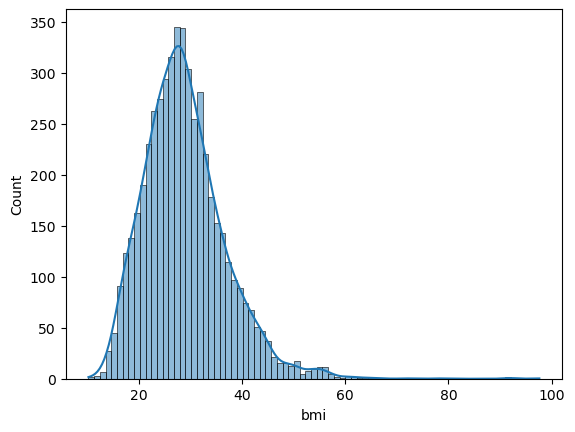

In [31]:
sns.histplot(df['bmi'],kde=True)

<AxesSubplot:xlabel='avg_glucose_level', ylabel='Count'>

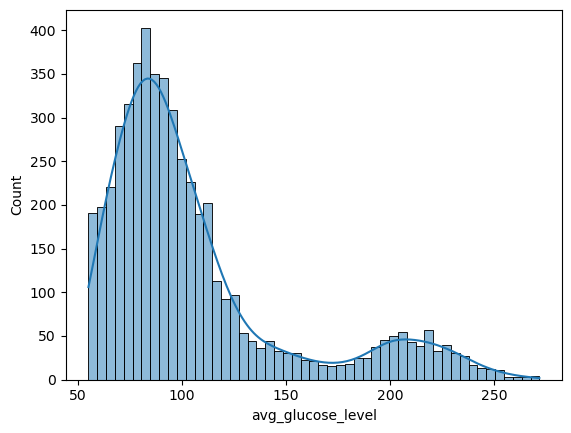

In [32]:
sns.histplot(df['avg_glucose_level'],kde=True)

In [33]:
df['bmi'].skew()

1.108228974138763

In [34]:
df['avg_glucose_level'].skew()

1.5728153284961561

In [35]:
print("mean value of bmi ",df['bmi'].mean())
print("Starndard deviation of bmi",df['bmi'].std())
print("Minimum value of bmi",df['bmi'].min())
print("Maximum value of bmi",df['bmi'].max())

mean value of bmi  28.946447445684075
Starndard deviation of bmi 7.91267789193538
Minimum value of bmi 10.3
Maximum value of bmi 97.6


In [36]:
print("Upper limit",df['bmi'].mean()+ 3*df['bmi'].std())
print("Lower limit",df['bmi'].mean()- 3*df['bmi'].std())

Upper limit 52.684481121490215
Lower limit 5.208413769877936


In [37]:
df[(df['bmi'] > 51.4) | (df['bmi']<7.8)]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke,bmi,ever_married_encoded,work_type_encoded,smoking_status_encoded,Residence_type_encoded
113,0,45.0,0,0,Yes,Private,Rural,224.10,never smoked,1,56.6,1,2,2,0
258,0,74.0,1,0,Yes,Self-employed,Urban,205.84,never smoked,0,54.6,1,3,2,1
270,0,57.0,1,0,Yes,Private,Rural,129.54,smokes,0,60.9,1,2,3,0
333,0,52.0,0,0,Yes,Private,Urban,82.24,formerly smoked,0,54.7,1,2,1,1
358,1,52.0,0,0,Yes,Self-employed,Urban,78.40,never smoked,0,64.8,1,3,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4475,0,48.0,1,0,Yes,Govt_job,Rural,221.08,never smoked,0,57.2,1,0,2,0
4779,0,58.0,0,0,Yes,Self-employed,Urban,66.71,never smoked,0,51.7,1,3,2,1
4838,0,51.0,0,0,Yes,Private,Urban,107.72,Unknown,0,60.9,1,2,0,1
4906,0,53.0,0,0,Yes,Private,Urban,70.51,never smoked,0,54.1,1,2,2,1


In [38]:
 df_no_outliers = df[(df['bmi'] < 52.5) & (df['bmi']>5.3)]

In [39]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke,bmi,ever_married_encoded,work_type_encoded,smoking_status_encoded,Residence_type_encoded
0,1,67.0,0,1,Yes,Private,Urban,228.69,formerly smoked,1,36.6,1,2,1,1
1,0,61.0,0,0,Yes,Self-employed,Rural,202.21,never smoked,1,33.2,1,3,2,0
2,1,80.0,0,1,Yes,Private,Rural,105.92,never smoked,1,32.5,1,2,2,0
3,0,49.0,0,0,Yes,Private,Urban,171.23,smokes,1,34.4,1,2,3,1
4,0,79.0,1,0,Yes,Self-employed,Rural,174.12,never smoked,1,24.0,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,Yes,Private,Urban,83.75,never smoked,0,29.6,1,2,2,1
5106,0,81.0,0,0,Yes,Self-employed,Urban,125.20,never smoked,0,40.0,1,3,2,1
5107,0,35.0,0,0,Yes,Self-employed,Rural,82.99,never smoked,0,30.6,1,3,2,0
5108,1,51.0,0,0,Yes,Private,Rural,166.29,formerly smoked,0,25.6,1,2,1,0


In [40]:
df_no_outliers['bmi'].max()

52.3

In [41]:
df_no_outliers['bmi'].min()

10.3

In [42]:
df_no_outliers['bmi'].max()

52.3

<AxesSubplot:xlabel='bmi', ylabel='Count'>

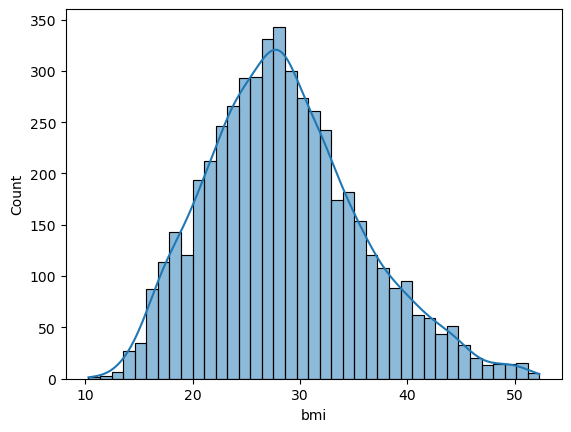

In [43]:
sns.histplot(df_no_outliers['bmi'],kde=True)

In [44]:
df_no_outliers['bmi'].skew()

0.4630968394644585

In [45]:
df_no_outliers['bmi'].mean()

28.58609350237721

In [46]:
df_no_outliers['bmi'].median()

28.0

In [47]:
df_no_outliers['bmi'].mode()

0    28.7
Name: bmi, dtype: float64

In [48]:
print("mean value of glucose level",df_no_outliers['avg_glucose_level'].mean())
print("Starndard deviation of glucose level",df_no_outliers['avg_glucose_level'].std())
print("Minimum value of glucose level",df_no_outliers['avg_glucose_level'].min())
print("Maximum value of glucose level",df_no_outliers['avg_glucose_level'].max())

mean value of glucose level 105.90344294770182
Starndard deviation of glucose level 45.00069198235446
Minimum value of glucose level 55.12
Maximum value of glucose level 271.74


In [49]:
print("Upper limit",df_no_outliers['avg_glucose_level'].mean()+ 3*df_no_outliers['avg_glucose_level'].std())
print("Lower limit",df_no_outliers['avg_glucose_level'].mean()- 3*df_no_outliers['avg_glucose_level'].std())

Upper limit 240.9055188947652
Lower limit -29.09863299936157


In [50]:
df_no_outliers = df_no_outliers[(df_no_outliers['avg_glucose_level'] <226.9) & (df_no_outliers['avg_glucose_level']>-20.0)]

In [51]:
df_no_outliers['avg_glucose_level'].skew()

1.5799732024987145

In [52]:
df_no_outliers['avg_glucose_level'].max()

226.88

In [53]:
df_no_outliers['avg_glucose_level'].min()

55.12

<AxesSubplot:xlabel='avg_glucose_level', ylabel='Count'>

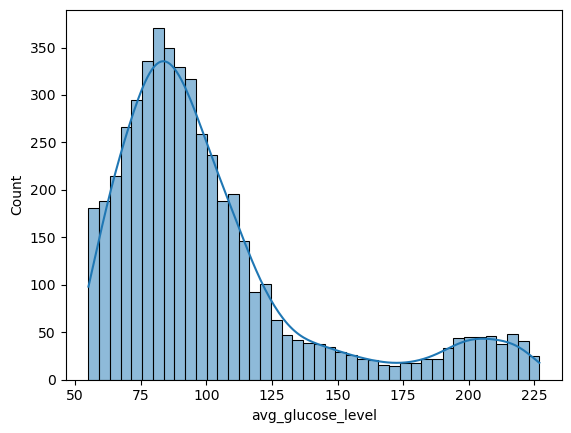

In [54]:
sns.histplot(df_no_outliers['avg_glucose_level'],kde=True)

In [55]:
df_no_outliers['avg_glucose_level'].mean()

101.85417023882395

In [56]:
df_no_outliers['avg_glucose_level'].median()

90.78

In [57]:
df_no_outliers['avg_glucose_level'].mode()

0    93.88
Name: avg_glucose_level, dtype: float64

4.Handling Imbalanced Data

In [58]:
df_no_outliers['stroke'].value_counts()

0    4673
1     226
Name: stroke, dtype: int64

In [59]:
df_0 = df_no_outliers[df_no_outliers['stroke']==0]
df_0

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke,bmi,ever_married_encoded,work_type_encoded,smoking_status_encoded,Residence_type_encoded
249,1,3.0,0,0,No,children,Rural,95.12,Unknown,0,18.0,0,4,0,0
250,1,58.0,1,0,Yes,Private,Urban,87.96,never smoked,0,39.2,1,2,2,1
251,0,8.0,0,0,No,Private,Urban,110.89,Unknown,0,17.6,0,2,0,1
252,0,70.0,0,0,Yes,Private,Rural,69.04,formerly smoked,0,35.9,1,2,1,0
253,1,14.0,0,0,No,Never_worked,Rural,161.28,Unknown,0,19.1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,Yes,Private,Urban,83.75,never smoked,0,29.6,1,2,2,1
5106,0,81.0,0,0,Yes,Self-employed,Urban,125.20,never smoked,0,40.0,1,3,2,1
5107,0,35.0,0,0,Yes,Self-employed,Rural,82.99,never smoked,0,30.6,1,3,2,0
5108,1,51.0,0,0,Yes,Private,Rural,166.29,formerly smoked,0,25.6,1,2,1,0


In [60]:
df_1 = df_no_outliers[df_no_outliers['stroke']==1]

In [61]:
from sklearn.utils import resample
df_1 = resample(df_1,replace=True,n_samples=df_0.shape[0],random_state=123)

In [62]:
df = np.concatenate((df_0,df_1))

In [63]:
df.shape

(9346, 15)

In [64]:
df_1

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke,bmi,ever_married_encoded,work_type_encoded,smoking_status_encoded,Residence_type_encoded
124,0,72.0,0,0,Yes,Private,Urban,219.91,Unknown,1,34.7,1,2,0,1
142,0,74.0,1,0,Yes,Private,Urban,70.28,never smoked,1,21.8,1,2,2,1
72,0,66.0,1,0,Yes,Govt_job,Rural,116.55,formerly smoked,1,31.1,1,0,1,0
241,1,57.0,0,0,Yes,Private,Rural,197.28,formerly smoked,1,34.5,1,2,1,0
110,1,79.0,0,1,Yes,Private,Rural,129.98,formerly smoked,1,22.6,1,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,0,78.0,1,0,No,Private,Urban,130.54,never smoked,1,20.1,0,2,2,1
192,1,59.0,0,0,Yes,Self-employed,Rural,118.03,smokes,1,35.5,1,3,3,0
132,1,69.0,1,0,No,Private,Rural,182.99,never smoked,1,36.5,0,2,2,0
35,0,82.0,1,1,No,Private,Rural,84.03,formerly smoked,1,26.5,0,2,1,0


In [65]:
df = pd.DataFrame(df)
df.columns=['gender','age','hypertension','heart_disease','ever_married','work_type','Residence_type',
            'avg_glucose_level','smoking_status','stroke','bmi','ever_married_encoded','work_type_encoded',
            'smoking_status_encoded','Residence_type_encoded']

<AxesSubplot:xlabel='bmi', ylabel='Count'>

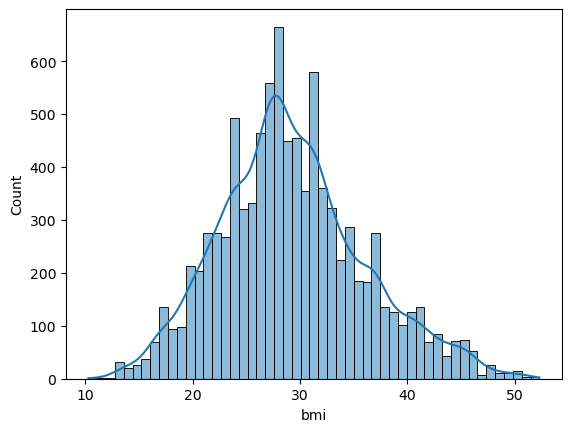

In [66]:
sns.histplot(df['bmi'],kde=True)

In [67]:
df['bmi'].mean()

29.263139310935053

In [68]:
df['bmi'].median()

28.6

In [69]:
df['bmi'].mode()

0    27.3
Name: bmi, dtype: object

<AxesSubplot:xlabel='avg_glucose_level', ylabel='Count'>

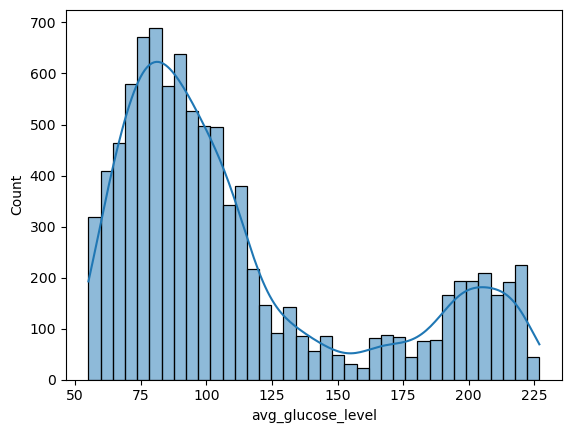

In [70]:
sns.histplot(df['avg_glucose_level'],kde=True)

In [71]:
df['avg_glucose_level'].median()

94.88499999999999

In [72]:
df['avg_glucose_level'].mean()

111.94294778514865

In [73]:
df['avg_glucose_level'].mode()

0    101.45
Name: avg_glucose_level, dtype: object

In [74]:
df['avg_glucose_level'].skew()

1.084520415516705

In [75]:
df['bmi'].skew()

0.38784093190613883

In [76]:
df['stroke'].value_counts()

0    4673
1    4673
Name: stroke, dtype: int64

In [77]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke,bmi,ever_married_encoded,work_type_encoded,smoking_status_encoded,Residence_type_encoded
0,1,3.0,0,0,No,children,Rural,95.12,Unknown,0,18.0,0,4,0,0
1,1,58.0,1,0,Yes,Private,Urban,87.96,never smoked,0,39.2,1,2,2,1
2,0,8.0,0,0,No,Private,Urban,110.89,Unknown,0,17.6,0,2,0,1
3,0,70.0,0,0,Yes,Private,Rural,69.04,formerly smoked,0,35.9,1,2,1,0
4,1,14.0,0,0,No,Never_worked,Rural,161.28,Unknown,0,19.1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9341,0,78.0,1,0,No,Private,Urban,130.54,never smoked,1,20.1,0,2,2,1
9342,1,59.0,0,0,Yes,Self-employed,Rural,118.03,smokes,1,35.5,1,3,3,0
9343,1,69.0,1,0,No,Private,Rural,182.99,never smoked,1,36.5,0,2,2,0
9344,0,82.0,1,1,No,Private,Rural,84.03,formerly smoked,1,26.5,0,2,1,0


In [78]:
df.isnull().sum()

gender                    0
age                       0
hypertension              0
heart_disease             0
ever_married              0
work_type                 0
Residence_type            0
avg_glucose_level         0
smoking_status            0
stroke                    0
bmi                       0
ever_married_encoded      0
work_type_encoded         0
smoking_status_encoded    0
Residence_type_encoded    0
dtype: int64

In [79]:
df.replace(to_replace='Unknown',value='Not Known',inplace=True)

In [80]:
X = df.drop(['ever_married','work_type','stroke','Residence_type','smoking_status'],axis=1)
y=df['stroke']

In [81]:
X

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,ever_married_encoded,work_type_encoded,smoking_status_encoded,Residence_type_encoded
0,1,3.0,0,0,95.12,18.0,0,4,0,0
1,1,58.0,1,0,87.96,39.2,1,2,2,1
2,0,8.0,0,0,110.89,17.6,0,2,0,1
3,0,70.0,0,0,69.04,35.9,1,2,1,0
4,1,14.0,0,0,161.28,19.1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
9341,0,78.0,1,0,130.54,20.1,0,2,2,1
9342,1,59.0,0,0,118.03,35.5,1,3,3,0
9343,1,69.0,1,0,182.99,36.5,0,2,2,0
9344,0,82.0,1,1,84.03,26.5,0,2,1,0


5. Spliting the Dataset

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [83]:
X_train

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,ever_married_encoded,work_type_encoded,smoking_status_encoded,Residence_type_encoded
251,0,28.0,0,0,183.45,40.5,1,2,3,1
3720,0,36.0,0,0,66.47,26.9,1,0,2,1
8376,1,78.0,0,0,90.19,26.9,0,3,2,1
4471,0,31.0,0,0,96.03,24.1,1,2,0,0
2835,1,46.0,0,0,66.59,36.7,1,2,1,0
...,...,...,...,...,...,...,...,...,...,...
5734,1,59.0,0,0,118.03,35.5,1,3,3,0
5191,0,55.0,1,1,210.40,40.0,1,2,3,1
5390,1,82.0,0,1,208.30,32.5,1,2,0,0
860,1,69.0,0,0,65.08,27.3,1,2,1,1


In [84]:
y_train

251     0
3720    0
8376    1
4471    0
2835    0
       ..
5734    1
5191    1
5390    1
860     0
7270    1
Name: stroke, Length: 7476, dtype: int64

6.Traning the Model

In [85]:
from sklearn.svm import SVC
classifer = SVC(kernel='linear',random_state=0)
classifer.fit(X_train,y_train)

SVC(kernel='linear', random_state=0)

In [86]:
print('Traning Accuracy: ',
     metrics.accuracy_score(y_train,classifer.predict(X_train))*100)

Traning Accuracy:  78.13001605136436


In [87]:
print('Validation Accuracy:',
     metrics.accuracy_score(y_test,classifer.predict(X_test))*100)

Validation Accuracy: 76.84491978609626


In [88]:
y_pred = classifer.predict(X_test)

In [89]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[658, 266],
       [167, 779]], dtype=int64)

In [90]:
classifer.score(X_test,y_test)

0.7684491978609626

In [91]:
classifier1 = RandomForestClassifier(n_estimators=80,criterion='entropy')
classifier1.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=80)

In [92]:
y_pred1 = classifier1.predict(X_test)

In [93]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred1)
cm

array([[911,  13],
       [  0, 946]], dtype=int64)

In [94]:
classifier1.score(X_test,y_test)

0.993048128342246

In [95]:
print('Traning Accuracy: ',
     metrics.accuracy_score(y_train,classifier1.predict(X_train))*100)

Traning Accuracy:  100.0


In [96]:
print('Validation Accuracy:',
     metrics.accuracy_score(y_test,classifier1.predict(X_test))*100)

Validation Accuracy: 99.30481283422459


8.Testing the Model

# Parameters
Male,Female --> 1,0
Age
Hypertension --> {'Yes':1,'No':0}
heart_disease  --> {'Yes': 1 , 'No' : 0}
avg_glucose_level
Bmi
Ever Married(Yes,No) --> 1,0
Work Type --> {'Govt_job': 0, 'Never_worked': 1, 'Private': 2, 'Self-employed': 3, 'children': 4}
Smoking Status --> {' Not known': 0, 'formerly smoked': 1, 'never smoked': 2, 'smokes': 3}
Residence Type --> {'Rural': 0, 'Urban': 1}

In [97]:
new_pred = classifier1.predict([[0,56.0,0,0,93.72,31.4,1,2,2,0]])
new_pred
if(new_pred ==1):
    print("You have strong chances of stroke..")
else:
    print("You are healthy")

You are healthy


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [98]:
new_pred = classifier1.predict([[0,76.0,0,0,140.10,29.9,1,2,1,1]])
new_pred
if(new_pred ==1):
    print("You have strong chances of stroke..")
else:
    print("You are healthy")

You have strong chances of stroke..


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [99]:
new_pred = classifier1.predict([[0,79.0,0,1,129.98,22.6,1,2,1,0]])
new_pred
if(new_pred ==1):
    print("You have strong chances of stroke..")
else:
    print("You are healthy")

You have strong chances of stroke..


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
